A acurácia do modelo é 0.9177602799650044
              precision    recall  f1-score   support

      Cammeo       0.91      0.90      0.90       490
    Osmancik       0.93      0.93      0.93       653

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143



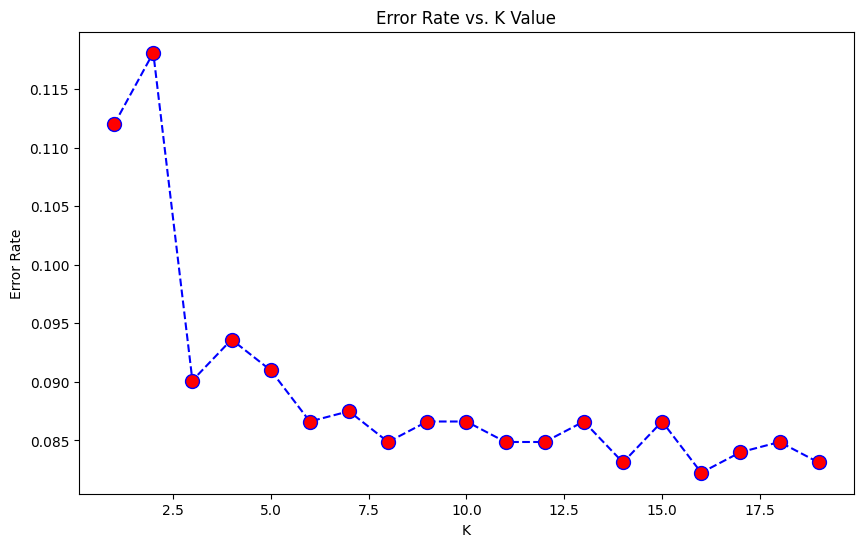

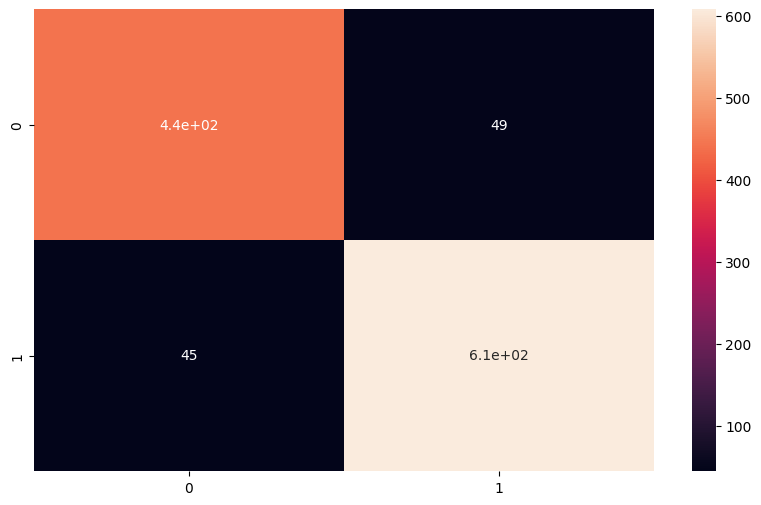

In [57]:

#1 Questao,letra a:Aborde o problema de classificacao utilizando o algoritmo k-NN.
#Importando dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)  
#Normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Reduzindo a dimensionalidade
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#Encontrando o melhor valor de k
error_rate = []
numero_k = 20
for i in range(1,numero_k):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))      
melhor_k = error_rate.index(min(error_rate))+1
#treinando o modelo com o melhor valor de k
knn = KNeighborsClassifier(n_neighbors=melhor_k) 
knn.fit(X_train,y_train.values.ravel())
predictions = knn.predict(X_test)
#Avaliando o modelo
print(f'A acurácia do modelo é {accuracy_score(y_test,predictions)}')
print(classification_report(y_test,predictions))
#Plotando a matriz de confusão  
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True) 
plt.show()






O erro médio quadrado do modelo é 3286.6025243163303
O coeficiente de determinação do modelo é 0.4703237032484663


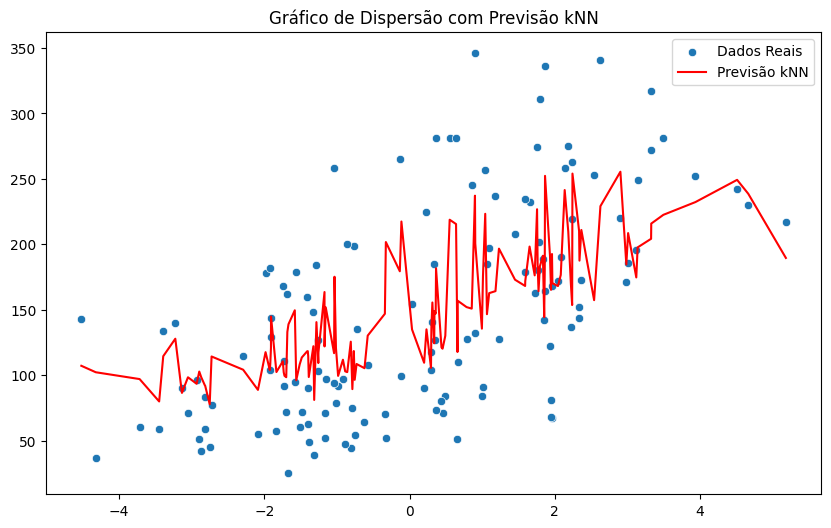

In [102]:
#2 Questao,Utilizando um banco de dados sugerido por voce, aborde o problema de regressao utilizando o algoritmo k-NN. Implemente a regressao em Jupyter Notebook.
#Importando dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

for i in range(1,11):
    # Dividindo o dataset em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    # Normalizando os dados
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Reduzindo a dimensionalidade
    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    varianciatotal = sum(pca.explained_variance_ratio_)
    if varianciatotal >= 0.99:
        nComponentes = i
        break
pca = PCA(n_components=nComponentes)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Encontrando o melhor valor de k
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error', error_score='raise')
    k_scores.append(scores.mean())
melhork= np.argmax(k_scores) +1
# Treinando o modelo com o melhor valor de k
knn = KNeighborsRegressor(n_neighbors=melhork)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
# Avaliando o modelo
print(f'O erro médio quadrado do modelo é {mean_squared_error(y_test, predictions)}')
print(f'O coeficiente de determinação do modelo é {r2_score(y_test, predictions)}')
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Dispersão com Linha de Regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=y_test, label='Dados Reais')
sns.lineplot(x=X_test[:, 0], y=predictions, color='red', label='Previsão kNN')
plt.title('Gráfico de Dispersão com Previsão kNN')
plt.legend()
plt.show()
